In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measure = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

stations = session.query(station.id).count()
print(stations)
measures = session.query(measure.id).count()
print(measures)

9
19550


In [10]:
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [16]:
columns = inspector.get_columns('measure')
for column in columns:
    primarykeystr = ""
    if column['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(column["name"], column["type"], primarykeystr)

In [13]:
columns = inspector.get_columns('station')
for column in columns:
    primarykeystr = ""
    if column['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(column["name"],column["type"],primarykeystr)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent = session.query(measure.date).order_by(measure.date.desc()).first()
print(recent)

('2017-08-23',)


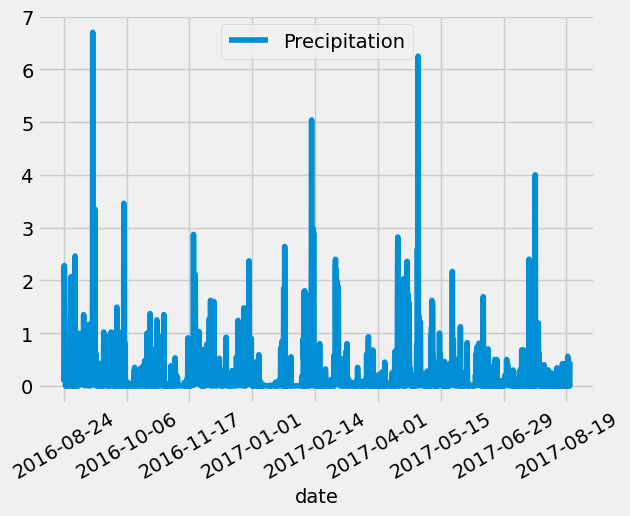

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precip = session.query(measure.date, measure.prcp).filter(measure.date >= "2016-08-24").filter(measure.date <= "2017-08-23").all()
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipdf = pd.DataFrame(precip).set_index('date')
precipdf = precipdf.rename(columns={'prcp':'Precipitation'})

# Sort the dataframe by date
precipdf = precipdf.sort_values(by='date')
precipdf = precipdf.dropna()
precipdf.head()

# Use Pandas Plotting with Matplotlib to plot the data
precipdf.plot(rot=30)
xlabel = "Date"
ylabel = "Precipitation (in Inches)"

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipdf.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

#Done above

[(9,)]

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationact = session.query(measure.station, func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()

stationact

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measure.tobs),
             func.max(measure.tobs),
             func.avg(measure.tobs)).filter(measure.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

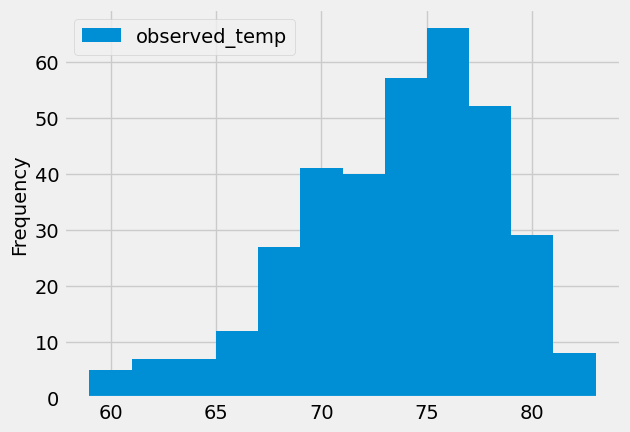

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measure.date, measure.tobs).filter(measure.date <= "2017-08-23").filter(measure.date >= "2016-08-24").filter(measure.station == "USC00519281").all()

tempsdf = pd.DataFrame(temps)
tempsdf = tempsdf.rename(columns={'tobs':'observed_temp'})

tempsdf.plot.hist(bins=12)

# Close Session

In [16]:
# Close Session
session.close()